In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 4 simple linear regression/delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.shape

(21, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.duplicated().sum()

0

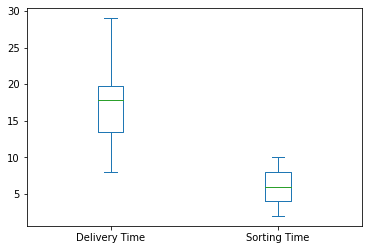

In [7]:
data.plot(kind="box")
plt.show()

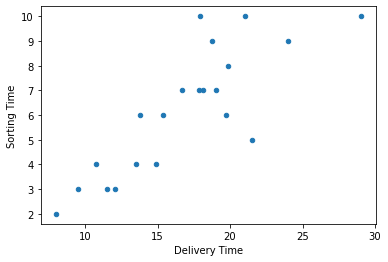

In [8]:
data.plot(kind="scatter" , x="Delivery Time" , y="Sorting Time")
plt.show()

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

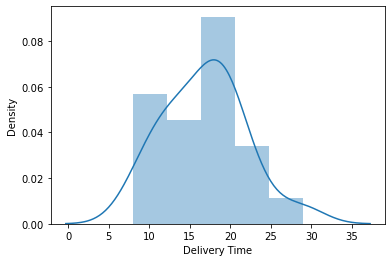

In [9]:
sns.distplot(data['Delivery Time'])

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

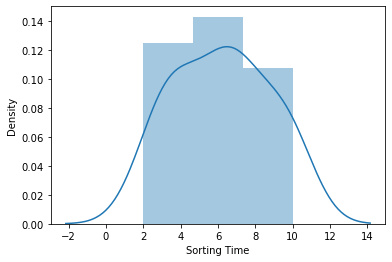

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [13]:
# model
model=smf.ols('delivery_time~sorting_time',data=data).fit()

In [14]:
print(model.tvalues, '\n', model.pvalues) 

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Log transformation

In [16]:
#Applying log transformation
model2=smf.ols("delivery_time~np.log(sorting_time)" , data=data).fit()

In [17]:
print(model2.tvalues, '\n', model2.pvalues) 

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [18]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# Sqrt transformation

In [19]:
#Applying sqrt transformation
x_sq = np.sqrt(data['sorting_time']).values.reshape(-1,1)
y_sq = data['delivery_time'].values.reshape(-1,1)

In [20]:
model_sq=smf.ols('y_sq~x_sq',data=data).fit()

In [21]:
print(model_sq.tvalues, '\n', model_sq.pvalues)  

Intercept   -0.840911
x_sq         6.592434
dtype: float64 
 Intercept    0.410857
x_sq         0.000003
dtype: float64


In [22]:
(model_sq.rsquared,model_sq.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

# exponential transformation

In [27]:
model_exp=smf.ols("np.log(delivery_time)~sorting_time" , data=data).fit()

In [28]:
print(model_exp.tvalues, '\n', model_exp.pvalues)  

Intercept       20.601357
sorting_time     6.836088
dtype: float64 
 Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [29]:
(model_exp.rsquared,model_exp.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

# reciprocal transformation

In [31]:
x_resp = data['sorting_time'].values.reshape(-1,1)
y_resp = 1/((data['delivery_time']).values.reshape(-1,1))

In [33]:
model_resp=smf.ols('y_resp~x_resp',data=data).fit()

In [35]:
print(model_resp.tvalues, '\n', model_resp.pvalues)  

Intercept    14.525932
x_resp       -6.378315
dtype: float64 
 Intercept    9.669983e-12
x_resp       4.059187e-06
dtype: float64


In [36]:
(model_resp.rsquared,model_resp.rsquared_adj)

(0.6816508639250471, 0.6648956462368918)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

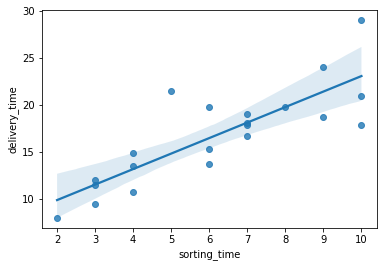

In [23]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)

In [24]:
#Prediction
newdata=pd.Series([4,10])

In [25]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [26]:
model2.predict(data_pred)

0    13.696517
1    21.982913
dtype: float64